In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from datetime import datetime









In [3]:
train_data = pd.read_csv("C:/Users/USER/Downloads/train_users_2.csv")
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,Unnamed: 5,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/2010,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/2011,2.009050e+13,NaN,MALE,NaN,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/2010,2.009060e+13,8/2/2010,FEMALE,NaN,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/2011,2.009100e+13,9/8/2012,FEMALE,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/2010,2.009120e+13,2/18/2010,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
train_data.describe()

,timestamp_first_active,Unnamed: 5,signup_flow
count,2.134510e+05,0.0,213451.000000
mean,2.013083e+13,NaN,3.267387
std,9.253690e+09,NaN,7.637707
min,2.009030e+13,NaN,0.000000
25%,2.012120e+13,NaN,0.000000
50%,2.013090e+13,NaN,0.000000
75%,2.014030e+13,NaN,0.000000
max,2.014060e+13,NaN,25.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  float64
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   Unnamed: 5               0 non-null       float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [6]:
print("Shape of train data:",train_data.shape)

Shape of train data: (213451, 16)


In [7]:
#printing number of null values in each colums present 
print("number of null values in each column:\n")     
train_data.isna().sum()

number of null values in each column:



id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
Unnamed: 5                 213451
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In the above output we can see that the three colums ( date_first_booking, age, first_affiliate_tracked) have missing values

Text(0, 0.5, 'Number of users')

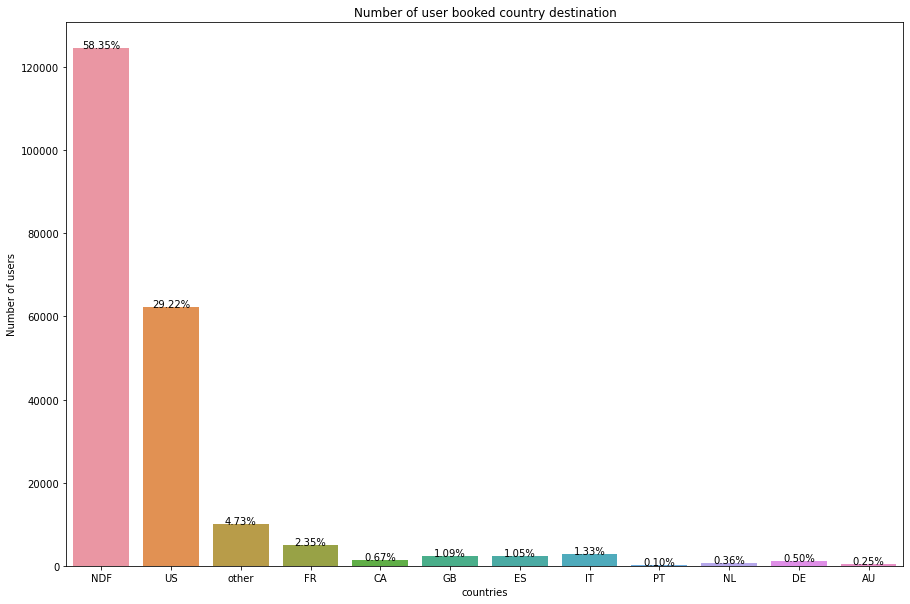

In [8]:
# plotting number of data points in each class
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='country_destination')    #countplot is used to count number of obs in a categorical variable
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))            #to get 2 valus after the decimal points 
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')                 #using annotate to specify a thing  in this case we specified percentage in the centre of the plot
plt.title('Number of user booked country destination')
plt.xlabel("countries")
plt.ylabel("Number of users")

From the above graph we can see that the data is being heavily imbalanced between the classes like NDF has the highest percentage and AU has very low percentage and so on.

## Date of account created

To analyse the date of account created by the users 

In [9]:
train_data['date_account_created']=pd.to_datetime(train_data['date_account_created'])

To extract the exaact year, momth and the day of the week the account was created

In [11]:
train_data['year_account_created']=pd.DatetimeIndex(train_data['date_account_created']).year
train_data['month_account_created']=pd.DatetimeIndex(train_data['date_account_created']).month
train_data['day_account_created']=pd.DatetimeIndex(train_data['date_account_created']).dayofweek

Text(0, 0.5, 'Number of new users users')

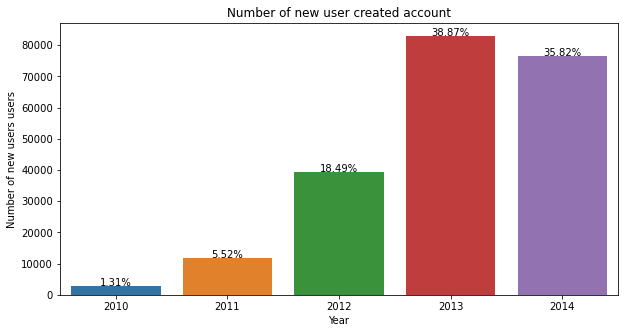

In [12]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=train_data,x='year_account_created')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.title('Number of new user created account')
plt.xlabel("Year")
plt.ylabel("Number of new users users")
     

Each year we could see that the number of users gets increased but in 2014 we could see some reduction because in training data we have till the 6th month of 2014.

Analyse the number of new user creating account in each month 

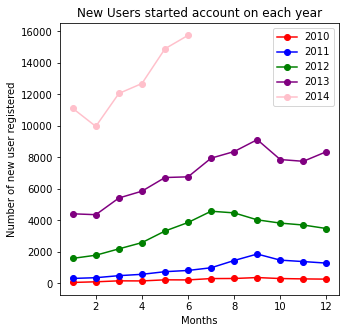

In [13]:
data_2010=train_data[train_data['year_account_created']==2010]['month_account_created'].value_counts().sort_index()
data_2011=train_data[train_data['year_account_created']==2011]['month_account_created'].value_counts().sort_index()
data_2012=train_data[train_data['year_account_created']==2012]['month_account_created'].value_counts().sort_index()
data_2013=train_data[train_data['year_account_created']==2013]['month_account_created'].value_counts().sort_index()
data_2014=train_data[train_data['year_account_created']==2014]['month_account_created'].value_counts().sort_index()
years=['2010','2011','2012','2013','2014']
data=[data_2010,data_2011,data_2012,data_2013,data_2014]
colors=['red','blue','green','purple','pink']

fig=plt.figure(figsize=(5,5))
for i in range(5):
  plt.plot(data[i].keys(),data[i],color=colors[i],label=years[i],marker='o')
plt.xlabel('Months')
plt.ylabel("Number of new user registered")
plt.title('New Users started account on each year')
plt.legend()

From the above graph we can see that between 6th,7th,8th and 9th months there are lot of new users who created their accounts. During that time people prefer to go to some other places. This graph shows us seasonal changes.

Here we can see that a rise in new user account creation after sunday. Weekdays are more preferred than weekends for the creation of account.

([<matplotlib.axis.XTick at 0x28bb5d0c460>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

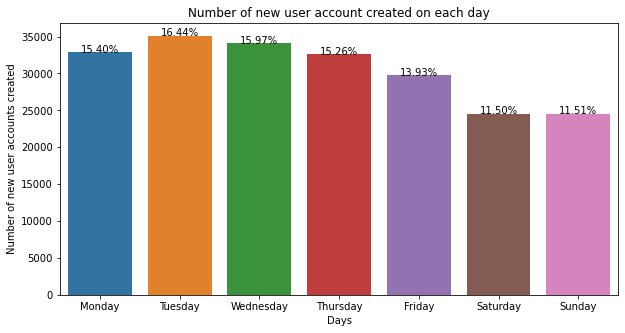

In [14]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=train_data,x='day_account_created')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.title("Number of new user account created on each day")
plt.xlabel("Days")
plt.ylabel("Number of new user accounts created")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

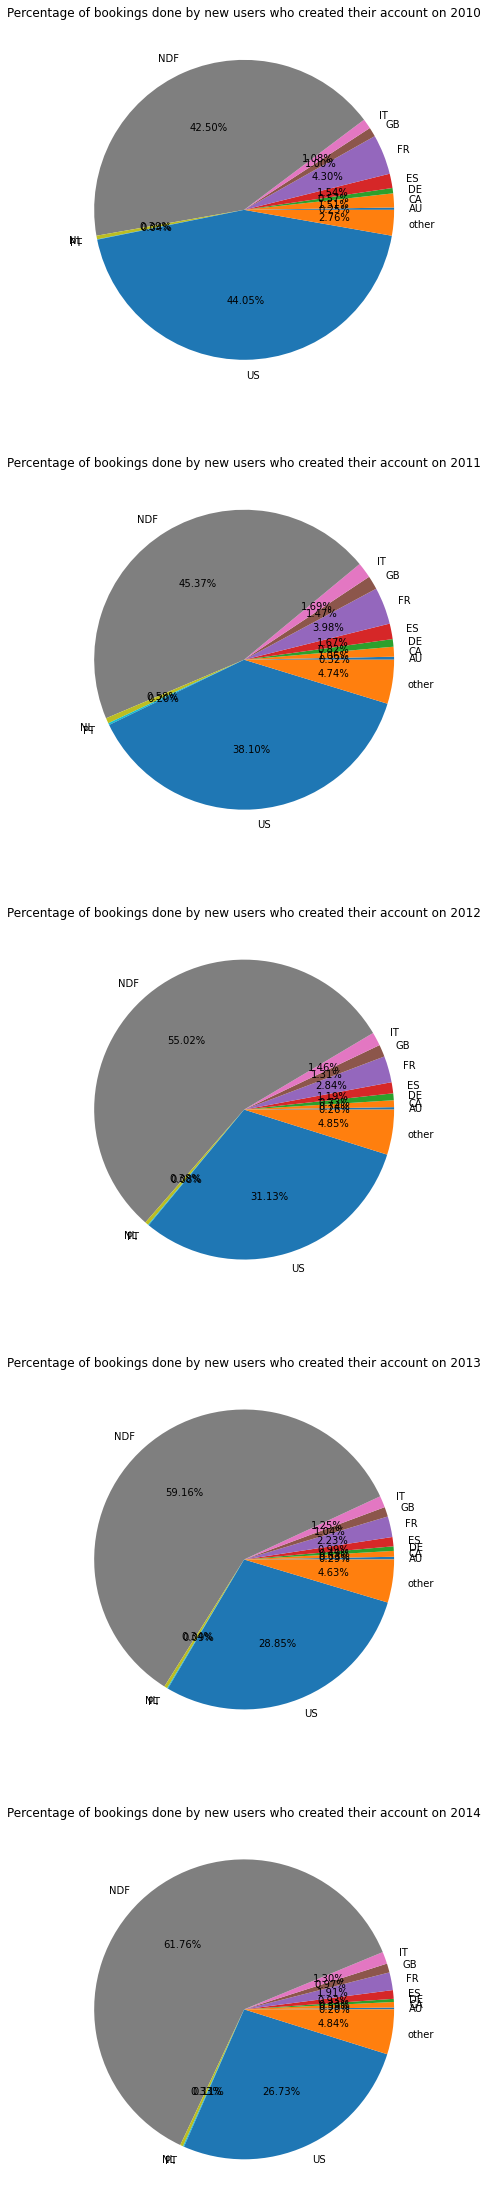

In [48]:
data_2010=train_data[train_data['year_account_created']==2010]['country_destination'].value_counts().sort_index()
data_2011=train_data[train_data['year_account_created']==2011]['country_destination'].value_counts().sort_index()
data_2012=train_data[train_data['year_account_created']==2012]['country_destination'].value_counts().sort_index()
data_2013=train_data[train_data['year_account_created']==2013]['country_destination'].value_counts().sort_index()
data_2014=train_data[train_data['year_account_created']==2014]['country_destination'].value_counts().sort_index()
data=[data_2010,data_2011,data_2012,data_2013,data_2014]

fig,ax=plt.subplots(5,figsize=(20,20))
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(ax.shape[0]):
  ax[i].pie(data[i].values,labels=data[i].index,autopct='%1.2f%%')
  ax[i].set_title("Percentage of bookings done by new users who created their account on {}".format(years[i]))

From the above pie chart we can notice that each year the percentage of ndf increases, while US decreases and the rest other countries tend to be almost same. Though each year we have increase in the number of users who created account many have not booked to any destination.

## Analysing new user registered in a particular month and their prefered destination

In [49]:
US_2010=[]
NDF_2010=[]
Others_2010=[]
for month in range(1,13):
  data=train_data[train_data['year_account_created']==2010][['month_account_created','country_destination']].value_counts().sort_index()[month]
  NDF_2010.append(data['NDF'])
  US_2010.append(data['US'])
  others=data.sum()-(data['NDF']+data['US'])
  Others_2010.append(others)

US_2011=[]
NDF_2011=[]
Others_2011=[]
for month in range(1,13):
  data=train_data[train_data['year_account_created']==2011][['month_account_created','country_destination']].value_counts().sort_index()[month]
  NDF_2011.append(data['NDF'])
  US_2011.append(data['US'])
  others=data.sum()-(data['NDF']+data['US'])
  Others_2011.append(others)

US_2012=[]
NDF_2012=[]
Others_2012=[]
for month in range(1,13):
  data=train_data[train_data['year_account_created']==2012][['month_account_created','country_destination']].value_counts().sort_index()[month]
  NDF_2012.append(data['NDF'])
  US_2012.append(data['US'])
  others=data.sum()-(data['NDF']+data['US'])
  Others_2012.append(others)

US_2013=[]
NDF_2013=[]
Others_2013=[]
for month in range(1,13):
  data=train_data[train_data['year_account_created']==2013][['month_account_created','country_destination']].value_counts().sort_index()[month]
  NDF_2013.append(data['NDF'])
  US_2013.append(data['US'])
  others=data.sum()-(data['NDF']+data['US'])
  Others_2013.append(others)

US_2014=[]
NDF_2014=[]
Others_2014=[]
for month in range(1,7):
  data=train_data[train_data['year_account_created']==2014][['month_account_created','country_destination']].value_counts().sort_index()[month]
  NDF_2014.append(data['NDF'])
  US_2014.append(data['US'])
  others=data.sum()-(data['NDF']+data['US'])
  Others_2014.append(others)

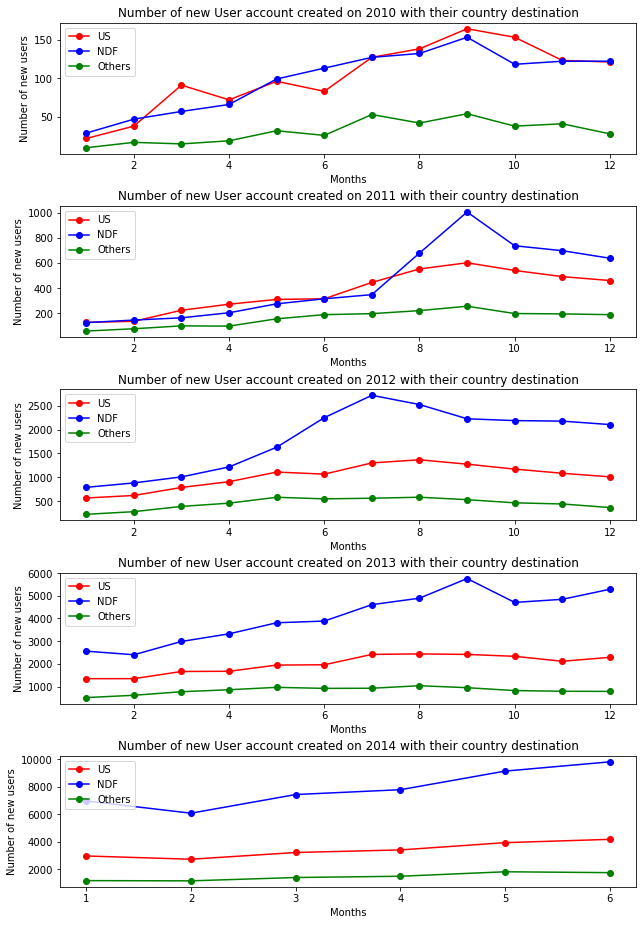

In [32]:
years=['2010','2011','2012','2013','2014']
overall_plots=[[US_2010,NDF_2010,Others_2010],[US_2011,NDF_2011,Others_2011],[US_2012,NDF_2012,Others_2012],
               [US_2013,NDF_2013,Others_2013],[US_2014,NDF_2014,Others_2014]]

fig,ax=plt.subplots(5,figsize=(10,15))
row=0
column=0
for i in range(ax.shape[0]):
  ax[i].plot(np.arange(1,len(overall_plots[i][0])+1),overall_plots[i][0],'red',label='US',marker='o')
  ax[i].plot(np.arange(1,len(overall_plots[i][1])+1),overall_plots[i][1],'blue',label='NDF',marker='o')
  ax[i].plot(np.arange(1,len(overall_plots[i][2])+1),overall_plots[i][2],'green',label='Others',marker='o')
  ax[i].set_xlabel('Months')
  ax[i].set_ylabel("Number of new users")
  ax[i].set_title("Number of new User account created on {} with their country destination".format(years[i]))
  ax[i].legend(loc='upper left')
  column+=1
  if column%2==0:
    column=0
    row+=1
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

From the above analysis we can see that each year during the months between 6 to 9 the number of users who doesn't make any bookings increases than the number users who done bookings. Though there is slight increase in the users who book to US subsequently NDF is much becomes higher and higher in each year.

Let us analyse how days determine one's destination.

([<matplotlib.axis.XTick at 0x1c1eec9a730>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

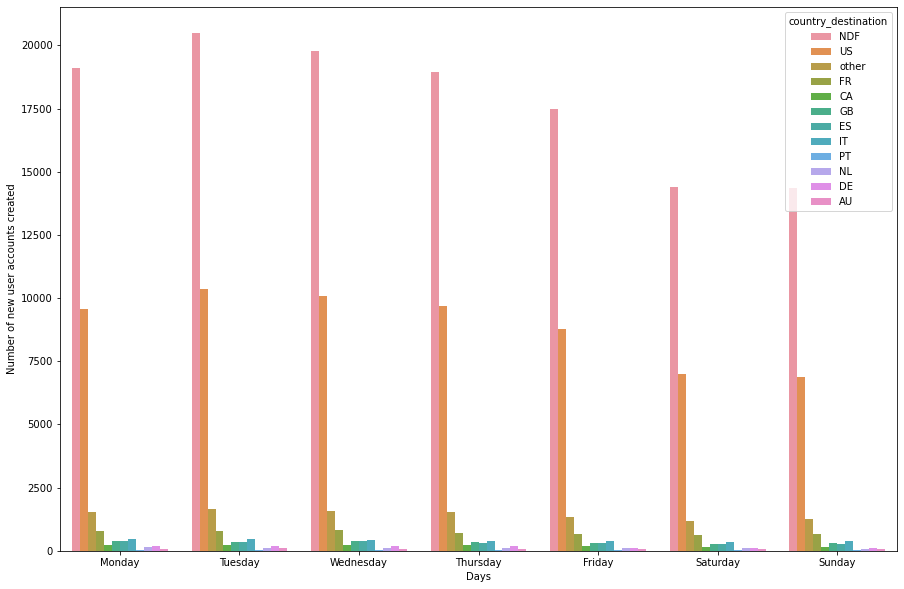

In [50]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='day_account_created',hue='country_destination',)
plt.xlabel("Days")
plt.ylabel("Number of new user accounts created")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

From the above graph we can see almost all country destination follows same pattern. By viewing in terms of percentage we could get some insights.

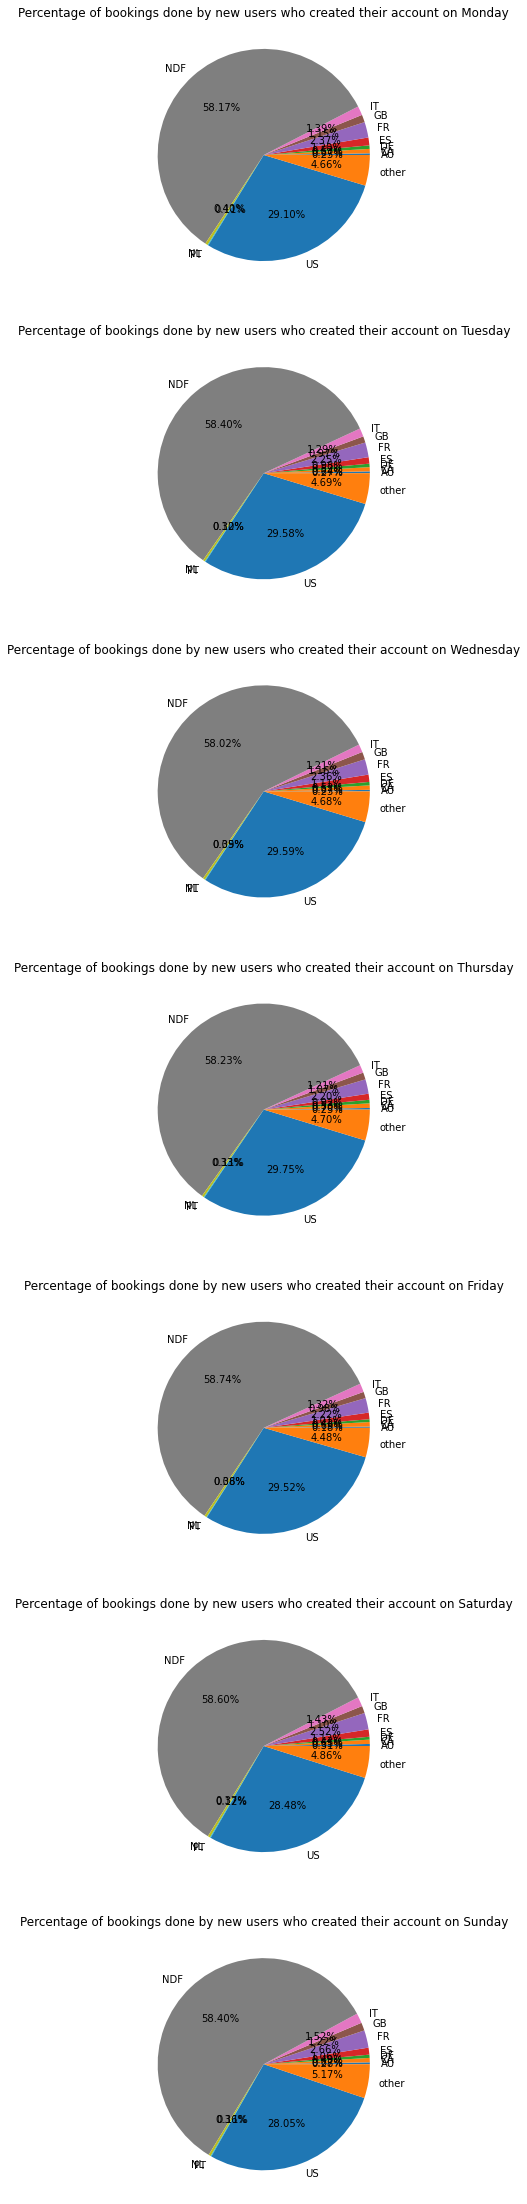

In [51]:
data_mon=train_data[train_data['day_account_created']==0]['country_destination'].value_counts().sort_index()
data_tue=train_data[train_data['day_account_created']==1]['country_destination'].value_counts().sort_index()
data_wed=train_data[train_data['day_account_created']==2]['country_destination'].value_counts().sort_index()
data_thu=train_data[train_data['day_account_created']==3]['country_destination'].value_counts().sort_index()
data_fri=train_data[train_data['day_account_created']==4]['country_destination'].value_counts().sort_index()
data_sat=train_data[train_data['day_account_created']==5]['country_destination'].value_counts().sort_index()
data_sun=train_data[train_data['day_account_created']==6]['country_destination'].value_counts().sort_index()
data=[data_mon,data_tue,data_wed,data_thu,data_fri,data_sat,data_sun]
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig,ax=plt.subplots(7,figsize=(20,20))
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(ax.shape[0]):
  ax[i].pie(data[i].values,labels=data[i].index,autopct='%1.2f%%')
  ax[i].set_title("Percentage of bookings done by new users who created their account on {}".format(days[i]))


From the above pie chart we can see that people who prefer to go to other countries(ie the countries that are not in the classes)(orange pie) many used to create their account on sundays. As mentioned in the ablove graph we could see almost similar patterns on all days for destination preferences.

## Signup flow

Text(0, 0.5, 'Number of users')

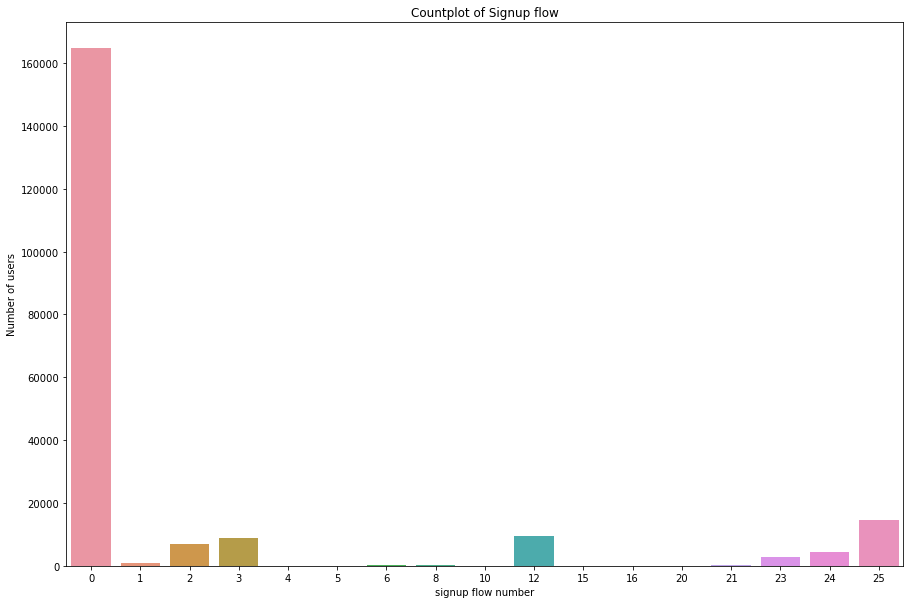

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='signup_flow')
plt.title("Countplot of Signup flow")
plt.xlabel("signup flow number")
plt.ylabel("Number of users")

Here we can see that many people signed up to the site from page 0(for security reasons airbnb didn't provide the signup page site). We can also see some cosiderable amount of people signing up from page 25,12,3,2,24,23,1. From other pages it is very low.

## Gender

Text(0.5, 1.0, 'Number of Users in gender')

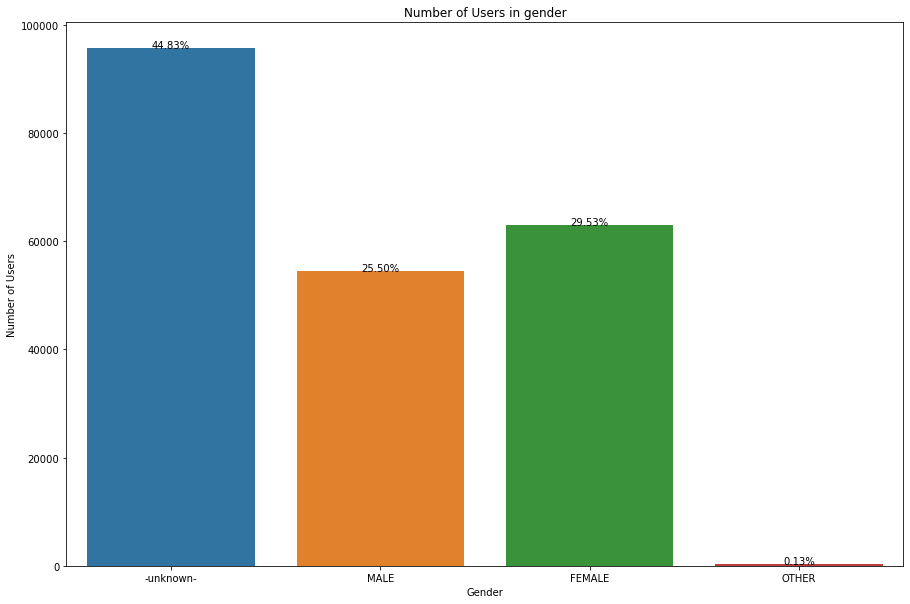

In [53]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='gender')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.title("Number of Users in gender")

From the above graph we can see feamale users are higher than the male users (according to those who registered their gender).

Text(0.5, 1.0, 'Country preferences based on gender')

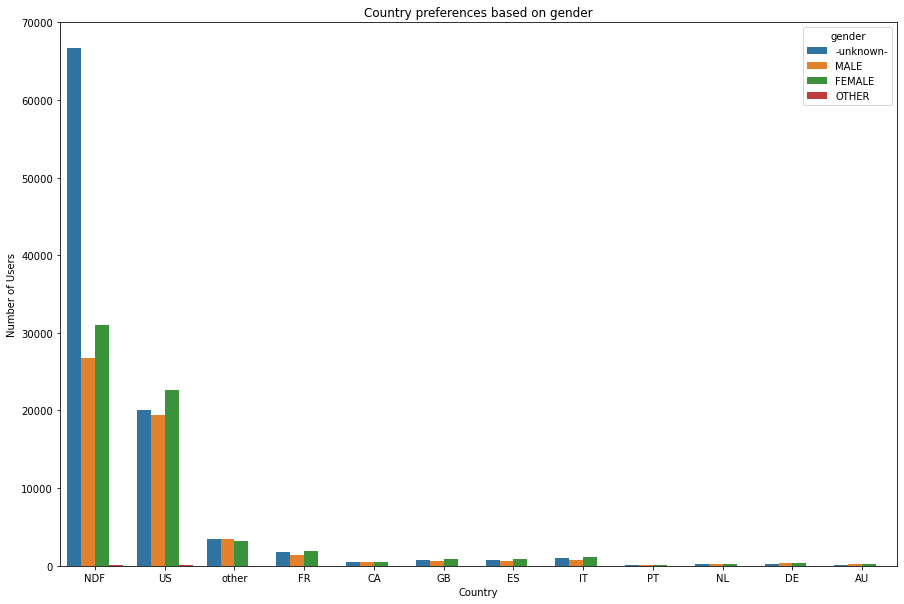

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,hue='gender',x='country_destination')
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.title("Country preferences based on gender")

From the above chart we can see that many female users prefer US as their destination, while many of those who didn't enter their gender didn't do any booking.

## Signup method

Text(0.5, 1.0, 'Number of users based on their sign up method')

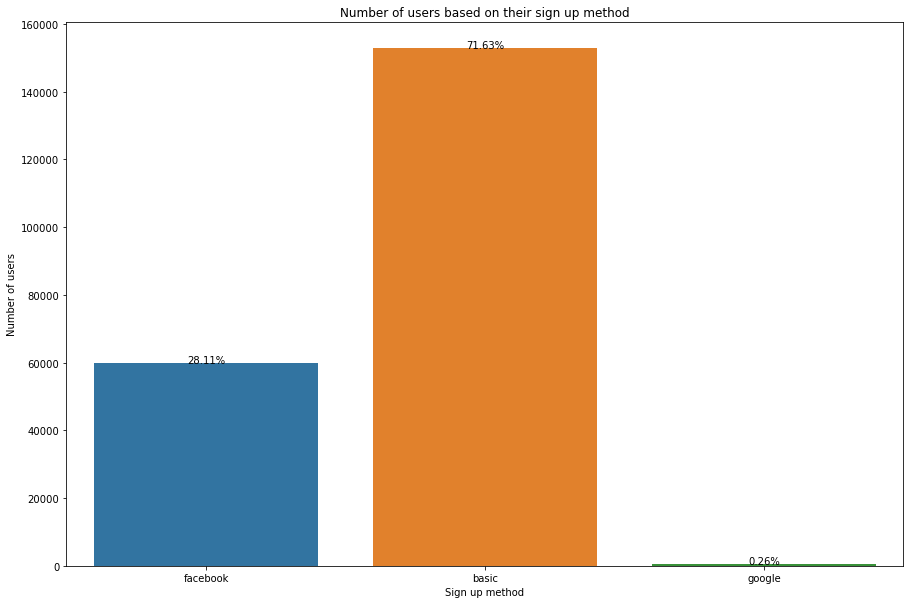

In [58]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='signup_method')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel("Sign up method")
plt.ylabel("Number of users")
plt.title("Number of users based on their sign up method")

We can see that about 71.63% of users did basic sign up while 28.11% used their facebook credenitals to sign up and 0.26% used their google accounts.

Text(0.5, 1.0, 'Country preferences based on sign up method')

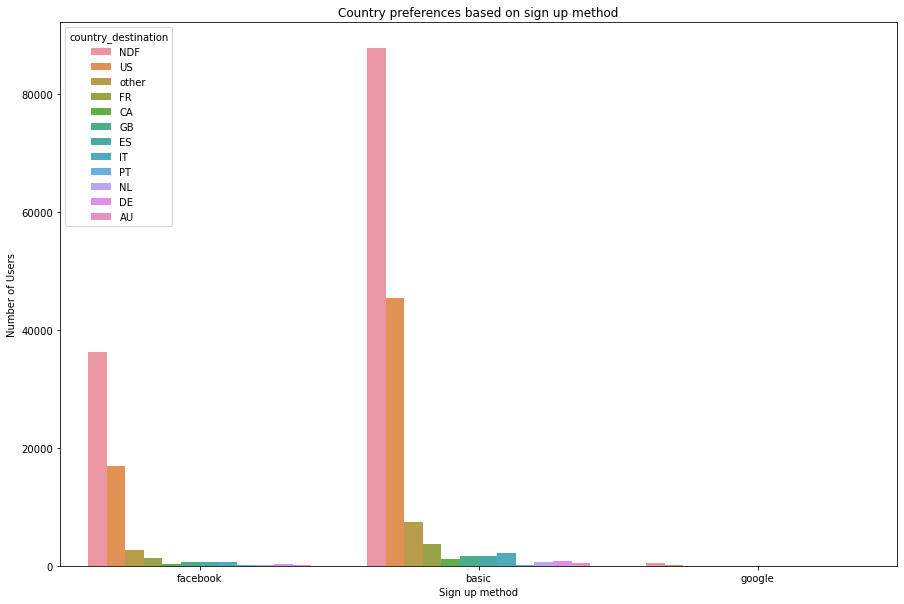

In [59]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='signup_method',hue='country_destination')
plt.xlabel("Sign up method")
plt.ylabel("Number of Users")
plt.title("Country preferences based on sign up method")

The above graph shows that all three sign up method almost follows same trend when it comes to users preferences.

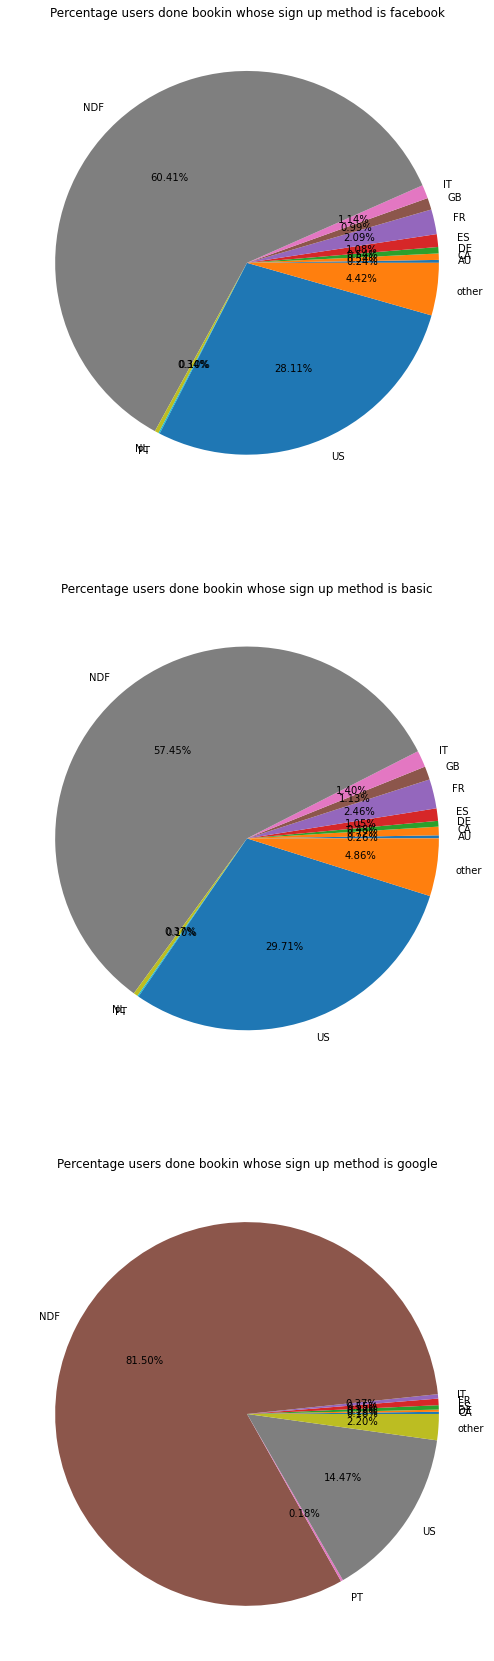

In [5]:
data_fb=train_data[train_data['signup_method']=='facebook']['country_destination'].value_counts().sort_index()
data_basic=train_data[train_data['signup_method']=='basic']['country_destination'].value_counts().sort_index()
data_google=train_data[train_data['signup_method']=='google']['country_destination'].value_counts().sort_index()
data=[data_fb,data_basic,data_google]
signup_met=['facebook','basic','google']

fig,ax=plt.subplots(3,figsize=(20,20))
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(ax.shape[0]):
  ax[i].pie(data[i].values,labels=data[i].index,autopct='%1.2f%%')
  ax[i].set_title("Percentage users done bookin whose sign up method is {}".format(signup_met[i]))

From the above pie diagram we can see that a persons who are doing sign up on using google account doesn't prefer destination. 

## Language

Text(0.5, 1.0, 'Countplot of users based on the language they know')

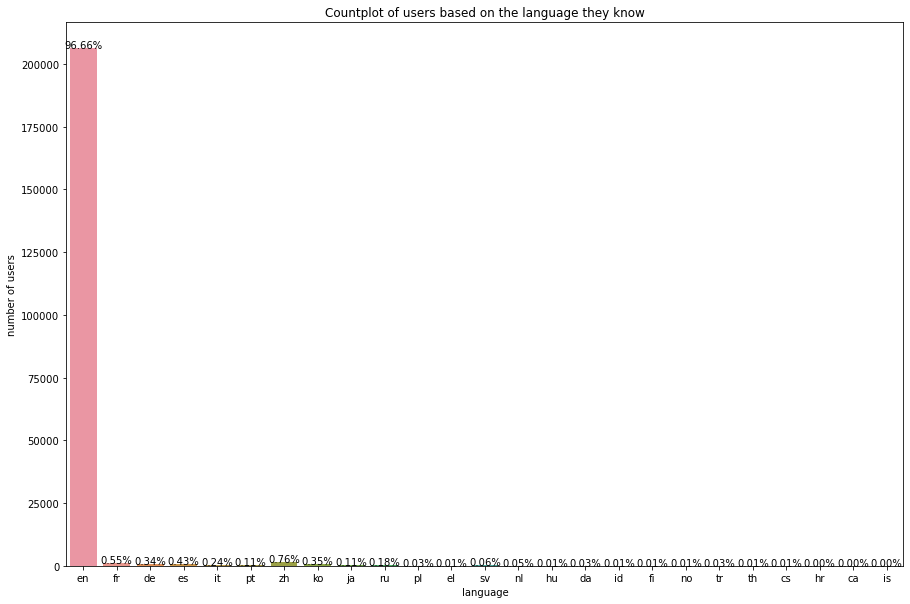

In [60]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='language')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel('language')
plt.ylabel('number of users')
plt.title("Countplot of users based on the language they know")

We can see that 96.66% of people native language is english and the rest lie below 1%.

In [61]:
train_data['language'].value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

## Affiliate channels

Text(0.5, 1.0, 'Number of users based on affliate channel')

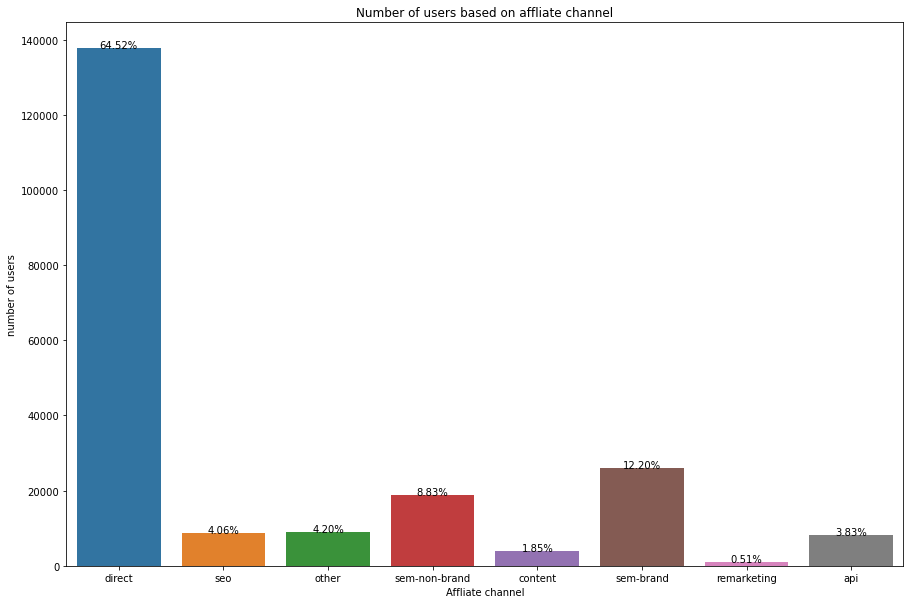

In [6]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='affiliate_channel')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel("Affliate channel")
plt.ylabel("number of users")
plt.title("Number of users based on affliate channel")
     

We can see that direct type of advertisment(or marketting) has attracted 64.52% of people to this site, while other paid marketting contents like seo, content have attracted much lower impact on attracting users.

Text(0.5, 1.0, 'Number of users based on affliate channel')

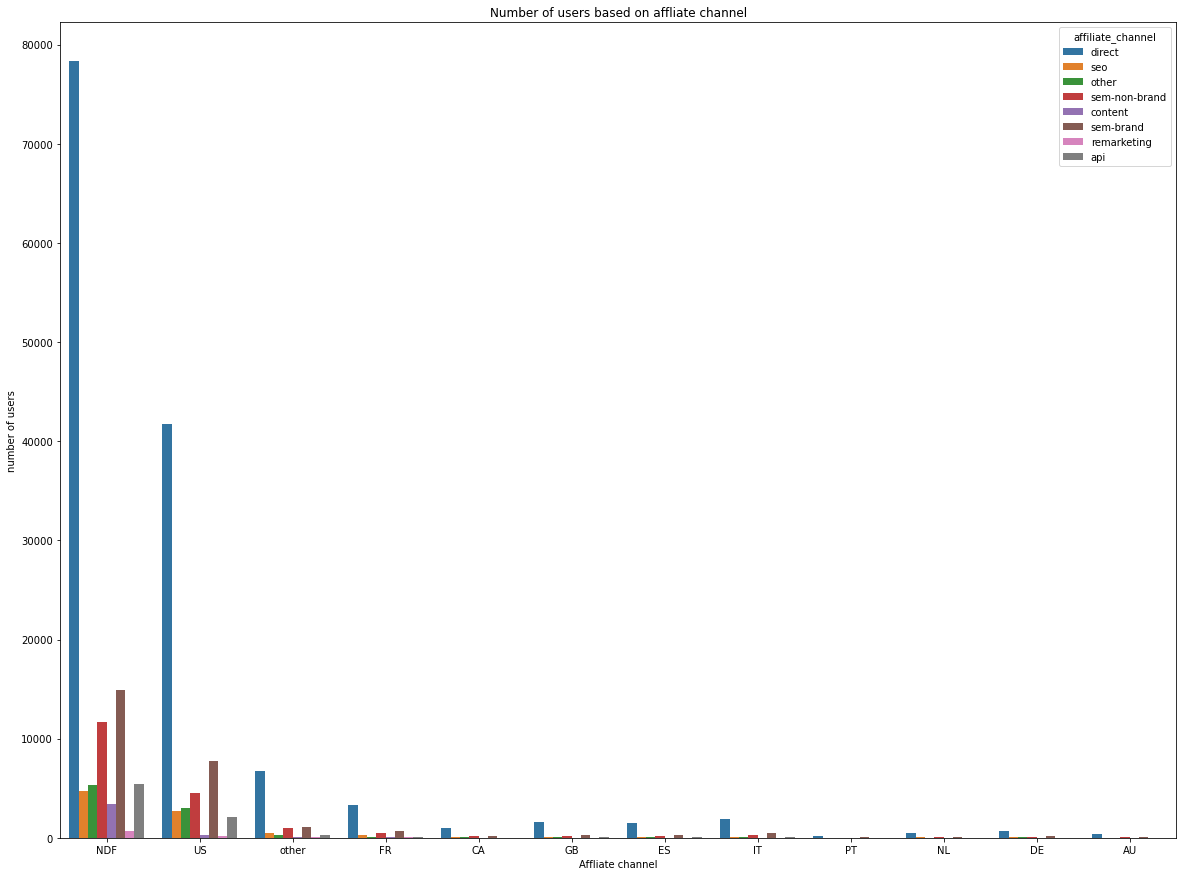

In [25]:
plt.figure(figsize=(20,15))
ax=sns.countplot(data=train_data,hue='affiliate_channel',x='country_destination')
plt.xlabel("Affliate channel")
plt.ylabel("number of users")
plt.title("Number of users based on affliate channel")

In the above chart we can see that a user who came to the site by a content affiliate mostly chooses no destinations. We can see that in US for the users who come through content is significantly low than that of comparing with NDF.

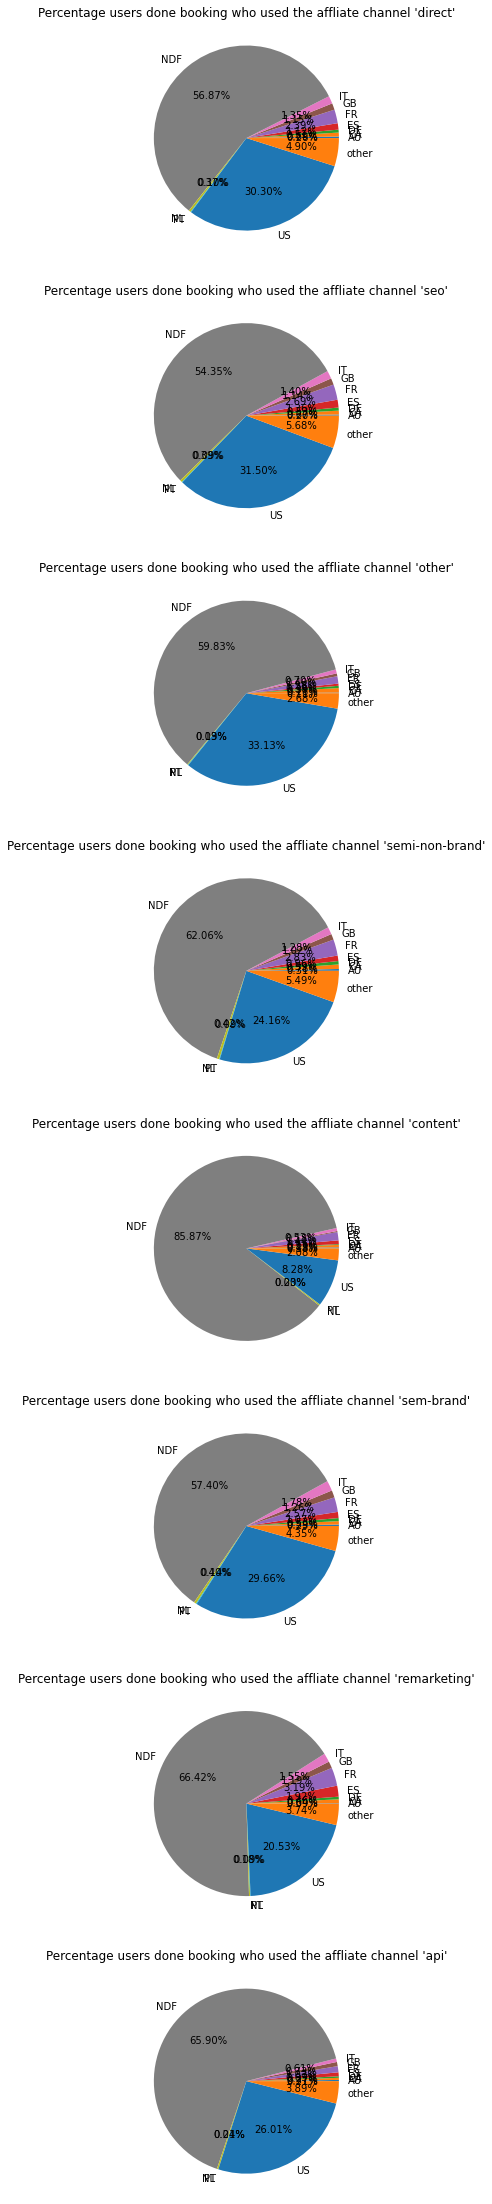

In [26]:
#Here data_di have the number of bookings done by the users to each country who arrived through direct type of marketting
#Similarly all other affliate channels are considered

data_di=train_data[train_data['affiliate_channel']=='direct']['country_destination'].value_counts().sort_index()
data_seo=train_data[train_data['affiliate_channel']=='seo']['country_destination'].value_counts().sort_index()
data_ot=train_data[train_data['affiliate_channel']=='other']['country_destination'].value_counts().sort_index()
data_snb=train_data[train_data['affiliate_channel']=='sem-non-brand']['country_destination'].value_counts().sort_index()
data_co=train_data[train_data['affiliate_channel']=='content']['country_destination'].value_counts().sort_index()
data_sb=train_data[train_data['affiliate_channel']=='sem-brand']['country_destination'].value_counts().sort_index()
data_re=train_data[train_data['affiliate_channel']=='remarketing']['country_destination'].value_counts().sort_index()
data_api=train_data[train_data['affiliate_channel']=='api']['country_destination'].value_counts().sort_index()

data=[data_di,data_seo,data_ot,data_snb,data_co,data_sb,data_re,data_api]
af_channel=['direct','seo','other','semi-non-brand','content','sem-brand','remarketing','api']

fig,ax=plt.subplots(8,figsize=(20,20))
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(ax.shape[0]):
  ax[i].pie(data[i].values,labels=data[i].index,autopct='%1.2f%%')
  ax[i].set_title("Percentage users done booking who used the affliate channel '{}'".format(af_channel[i]))

From the above chart we can see that the users who are from content based affliate channel doesn't usually make decision because NDF is 85.87%. Also, people who arrived to the site through 'other' types of affliation have the highest percentage of people going to US compared to other affliate channels.

## Affliate provider

Text(0.5, 1.0, 'Number of users based on affliate provider')

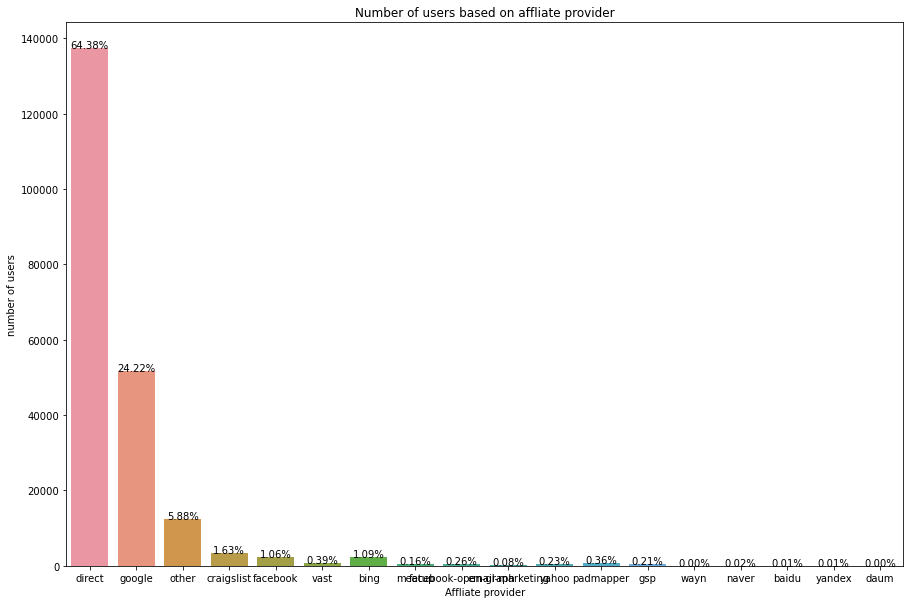

In [27]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='affiliate_provider')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel("Affliate provider")
plt.ylabel("number of users")
plt.title("Number of users based on affliate provider")

As we saw before how direct affiliation by the company attracted many users, here we can see that 64.38% users clicked the advertisment provided by the site directly. Other than that google also played a significant role in it making up to 24.22% of users, followed by some other websites like craigslist, facebook and so on.

In [28]:
100*(train_data.affiliate_provider.value_counts()/train_data.shape[0])

direct                 64.382926
google                 24.217736
other                   5.879101
craigslist              1.626134
bing                    1.090648
facebook                1.064881
vast                    0.388380
padmapper               0.359802
facebook-open-graph     0.255328
yahoo                   0.232372
gsp                     0.212227
meetup                  0.162567
email-marketing         0.077770
naver                   0.024362
baidu                   0.013586
yandex                  0.007964
wayn                    0.003748
daum                    0.000468
Name: affiliate_provider, dtype: float64

In [29]:
selected_aff_provider=(100*(train_data.affiliate_provider.value_counts()/train_data.shape[0]))[:12].index
selected_aff_provider

Index(['direct', 'google', 'other', 'craigslist', 'bing', 'facebook', 'vast',
       'padmapper', 'facebook-open-graph', 'yahoo', 'gsp', 'meetup'],
      dtype='object')

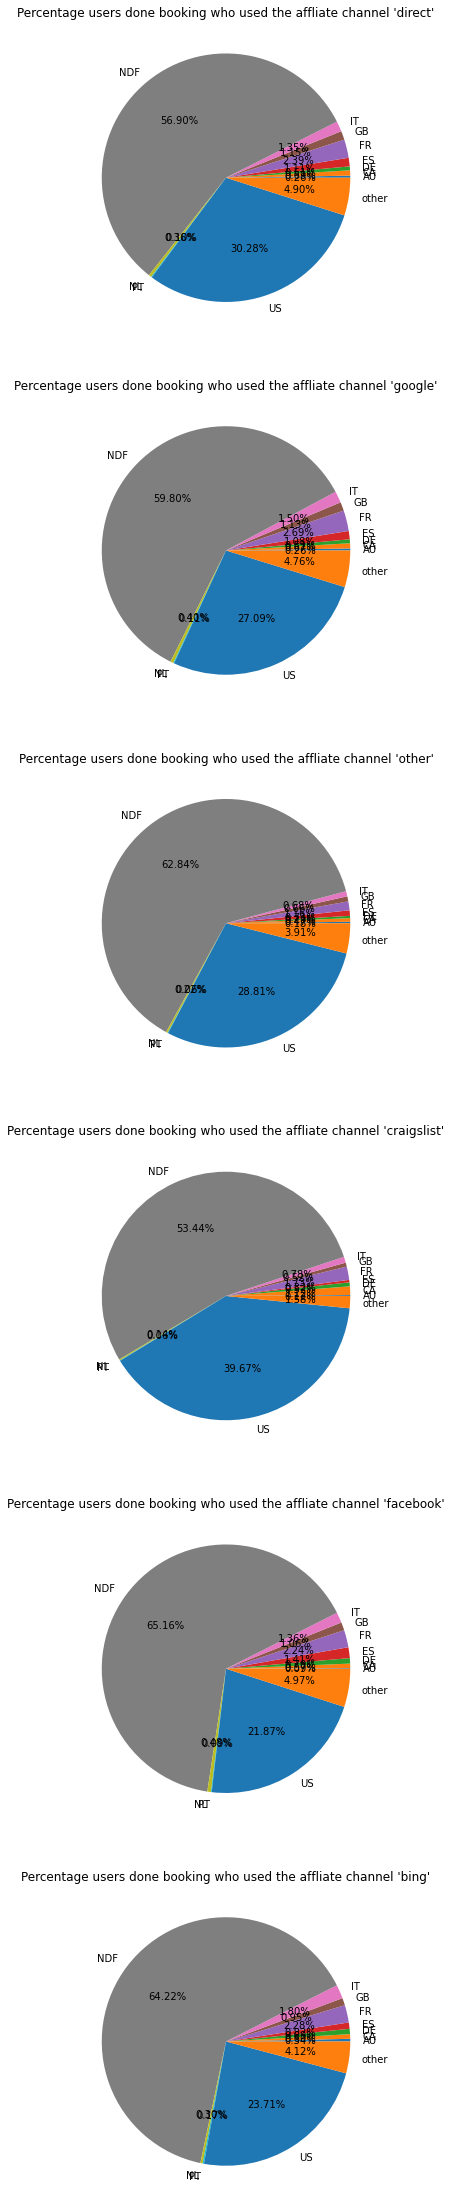

In [30]:
#Here data_di contains total number of users booked to each destination where the user's affiliate provider is 'direct'
#Similarly for other affiliate providers thi is done.

data_di=train_data[train_data['affiliate_provider']=='direct']['country_destination'].value_counts().sort_index()
data_go=train_data[train_data['affiliate_provider']=='google']['country_destination'].value_counts().sort_index()
data_ot=train_data[train_data['affiliate_provider']=='other']['country_destination'].value_counts().sort_index()
data_cr=train_data[train_data['affiliate_provider']=='craigslist']['country_destination'].value_counts().sort_index()
data_fb=train_data[train_data['affiliate_provider']=='facebook']['country_destination'].value_counts().sort_index()
data_bi=train_data[train_data['affiliate_provider']=='bing']['country_destination'].value_counts().sort_index()

data=[data_di,data_go,data_ot,data_cr,data_fb,data_bi]
af_provider=['direct','google','other','craigslist','facebook','bing']

fig,ax=plt.subplots(6,figsize=(20,20))
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(ax.shape[0]):
  ax[i].pie(data[i].values,labels=data[i].index,autopct='%1.2f%%')
  ax[i].set_title("Percentage users done booking who used the affliate channel '{}'".format(af_provider[i]))
     

From the above pie diagram we can see that people who used craigslist has an increased percentage of users who book to US than the others.

## First Affliate

In [31]:
print("Number of missing values:",train_data['first_affiliate_tracked'].isna().sum())

Number of missing values: 6065


Text(0.5, 1.0, 'Number of users based on first affliate tracked')

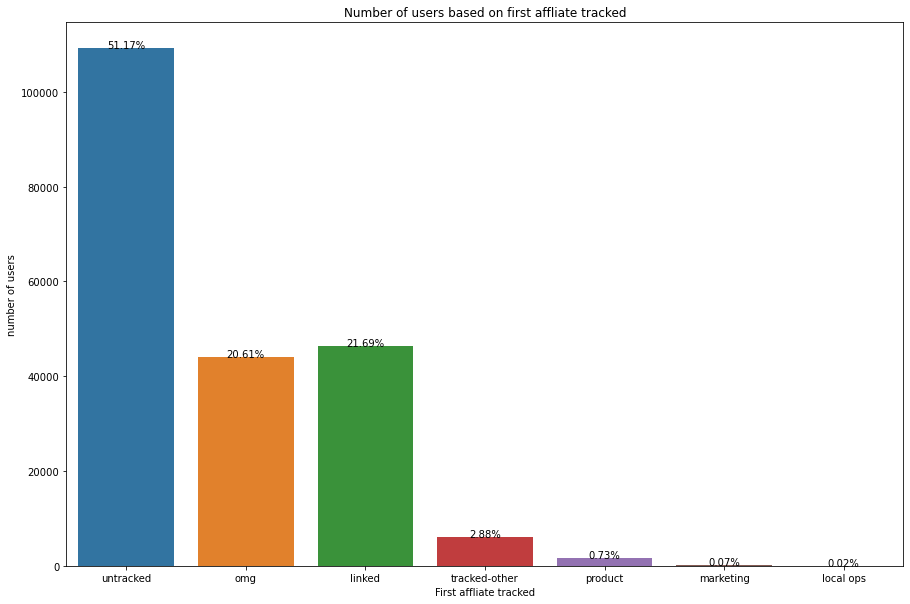

In [33]:

plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='first_affiliate_tracked')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel("First affliate tracked")
plt.ylabel("number of users")
plt.title("Number of users based on first affliate tracked")

## SignUp App


Text(0.5, 1.0, 'Number of users based on thier sign up app')

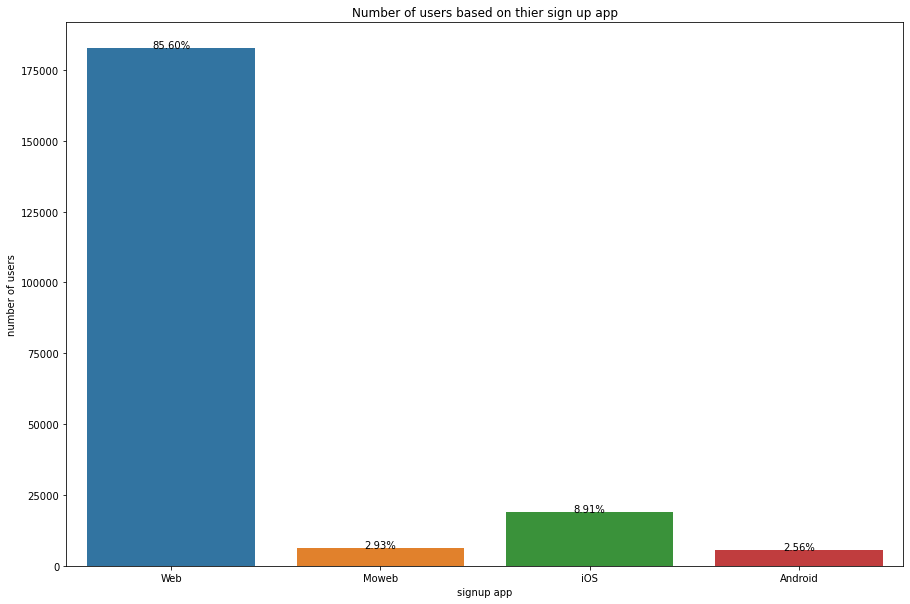

In [34]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='signup_app')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel("signup app")
plt.ylabel("number of users")
plt.title("Number of users based on thier sign up app")

We could see that large number of users, around 85.6% of people used Web applications to sign in. Ios application stands second with around 8.9% of users and with mobile web application 2.93% people signed up.

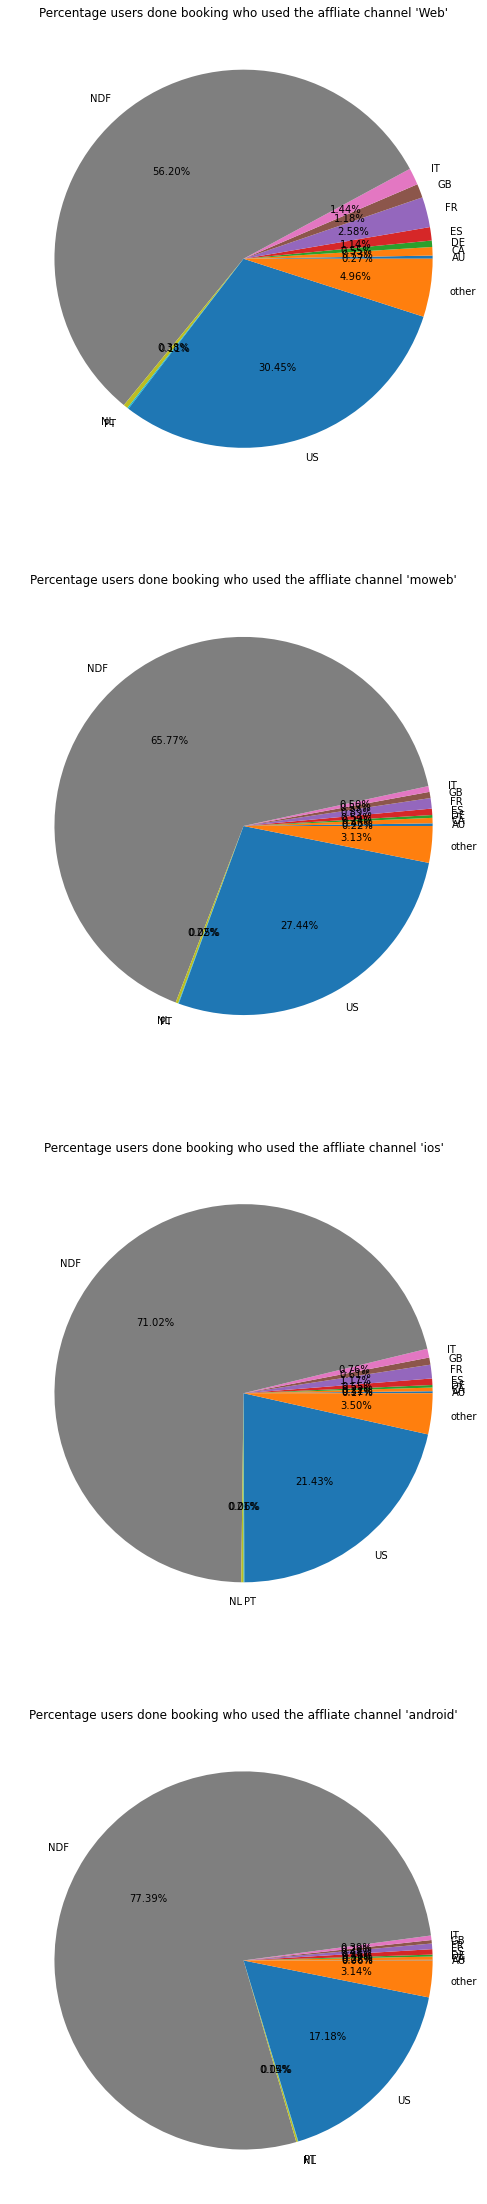

In [35]:
data_web=train_data[train_data['signup_app']=='Web']['country_destination'].value_counts().sort_index()
data_mweb=train_data[train_data['signup_app']=='Moweb']['country_destination'].value_counts().sort_index()
data_ios=train_data[train_data['signup_app']=='iOS']['country_destination'].value_counts().sort_index()
data_and=train_data[train_data['signup_app']=='Android']['country_destination'].value_counts().sort_index()

data=[data_web,data_mweb,data_ios,data_and]
af_provider=['Web','moweb','ios','android']

fig,ax=plt.subplots(4,figsize=(20,20))
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(ax.shape[0]):
  ax[i].pie(data[i].values,labels=data[i].index,autopct='%1.2f%%')
  ax[i].set_title("Percentage users done booking who used the affliate channel '{}'".format(af_provider[i]))

We can see that people who use mobile android or ios applications during sign up have considerably more percentage of people who does'nt prefer any destination.

## First Device Type

Text(0.5, 1.0, 'Number of users based on thier first device type')

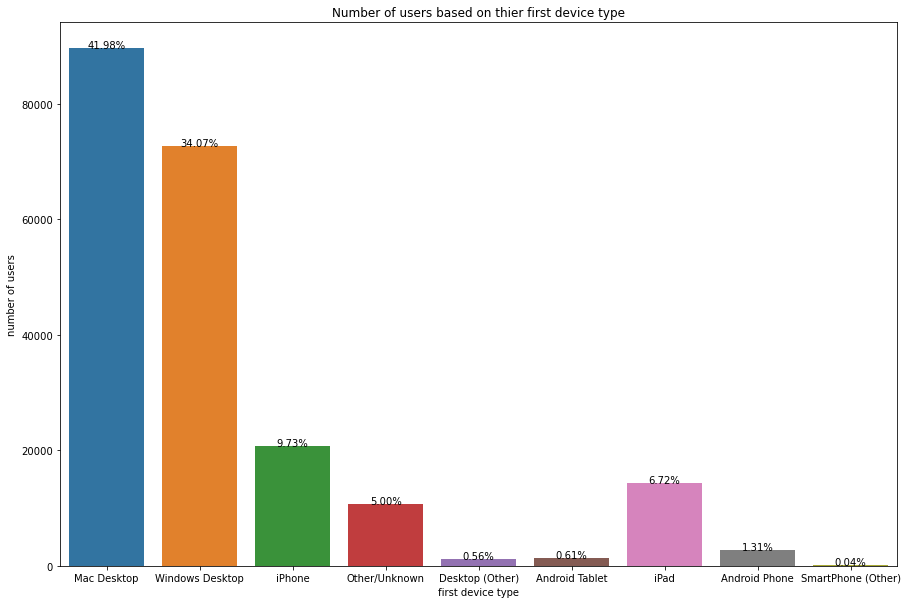

In [36]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train_data,x='first_device_type')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel("first device type")
plt.ylabel("number of users")
plt.title("Number of users based on thier first device type")

As we saw before Web applications are more preferred than mobile web applications, here we could see which kind of desktops, mobile, ipad more used by users. Desktop are used more by the users. When it comes to mobile phone types (including ipad) iphones contribute 9.73% followed by ipad 6.72% of users while android users are 1.31%.

Text(0.5, 1.0, 'Number of users based on thier first device type')

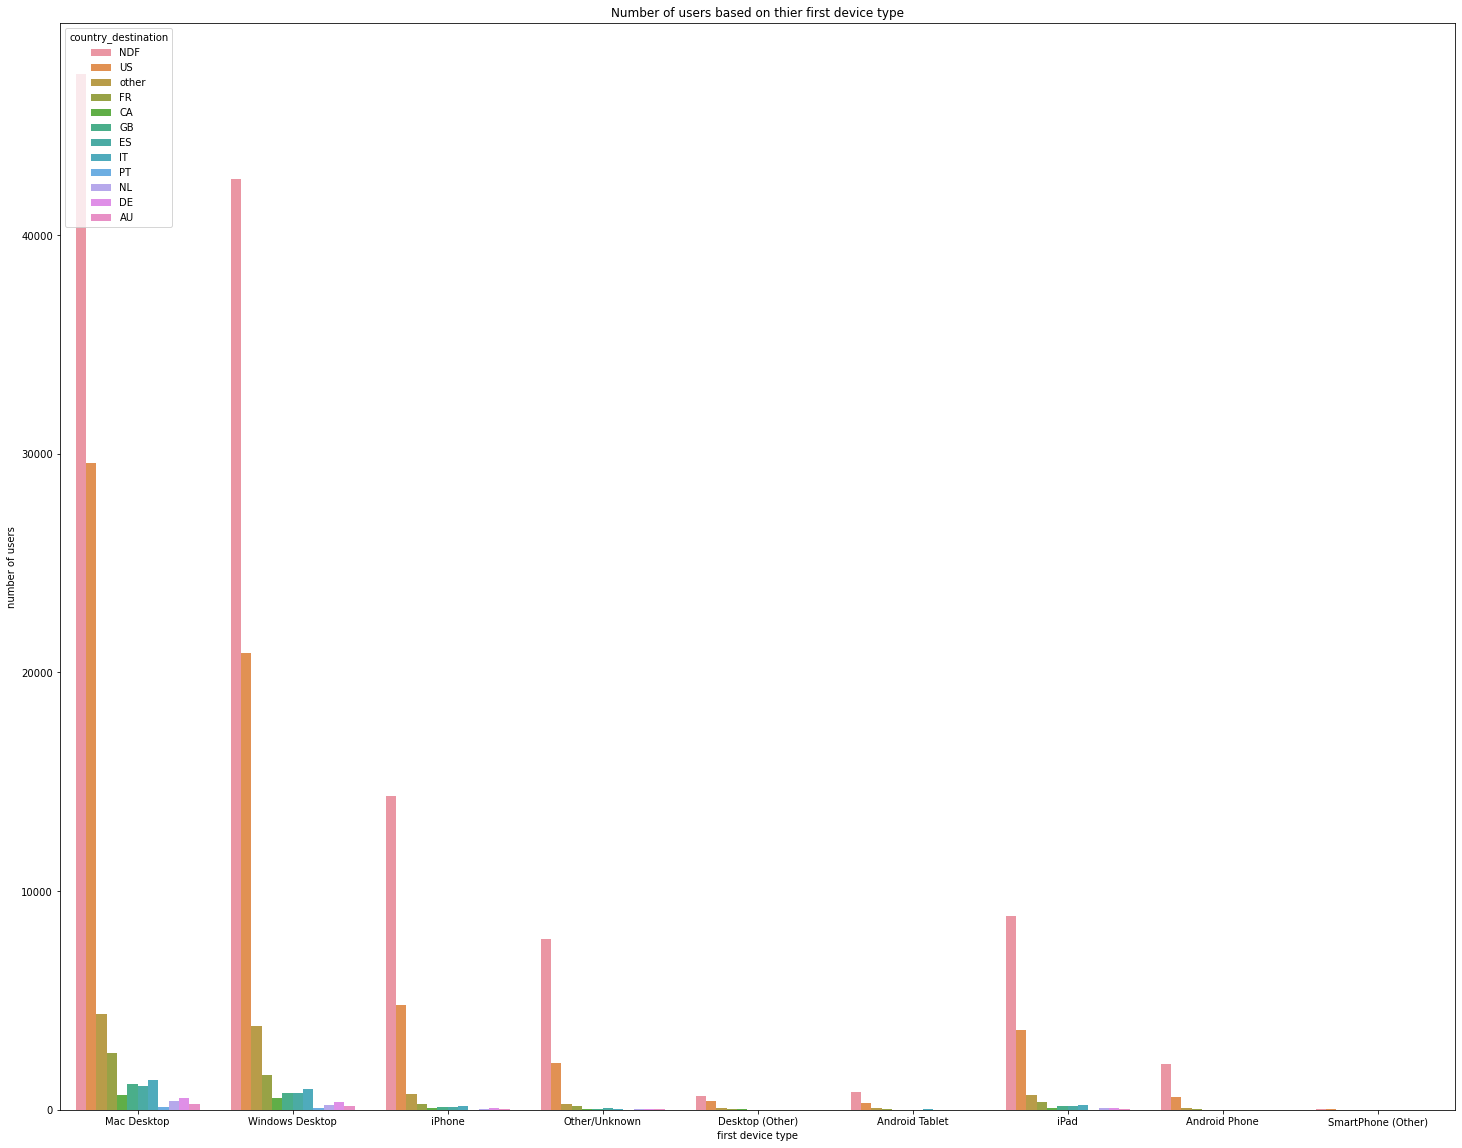

In [37]:
plt.figure(figsize=(25,20))
ax=sns.countplot(data=train_data,x='first_device_type',hue='country_destination')
plt.xlabel("first device type")
plt.ylabel("number of users")
plt.title("Number of users based on thier first device type")
     


seeing how the device usage helps in finding user's preference.

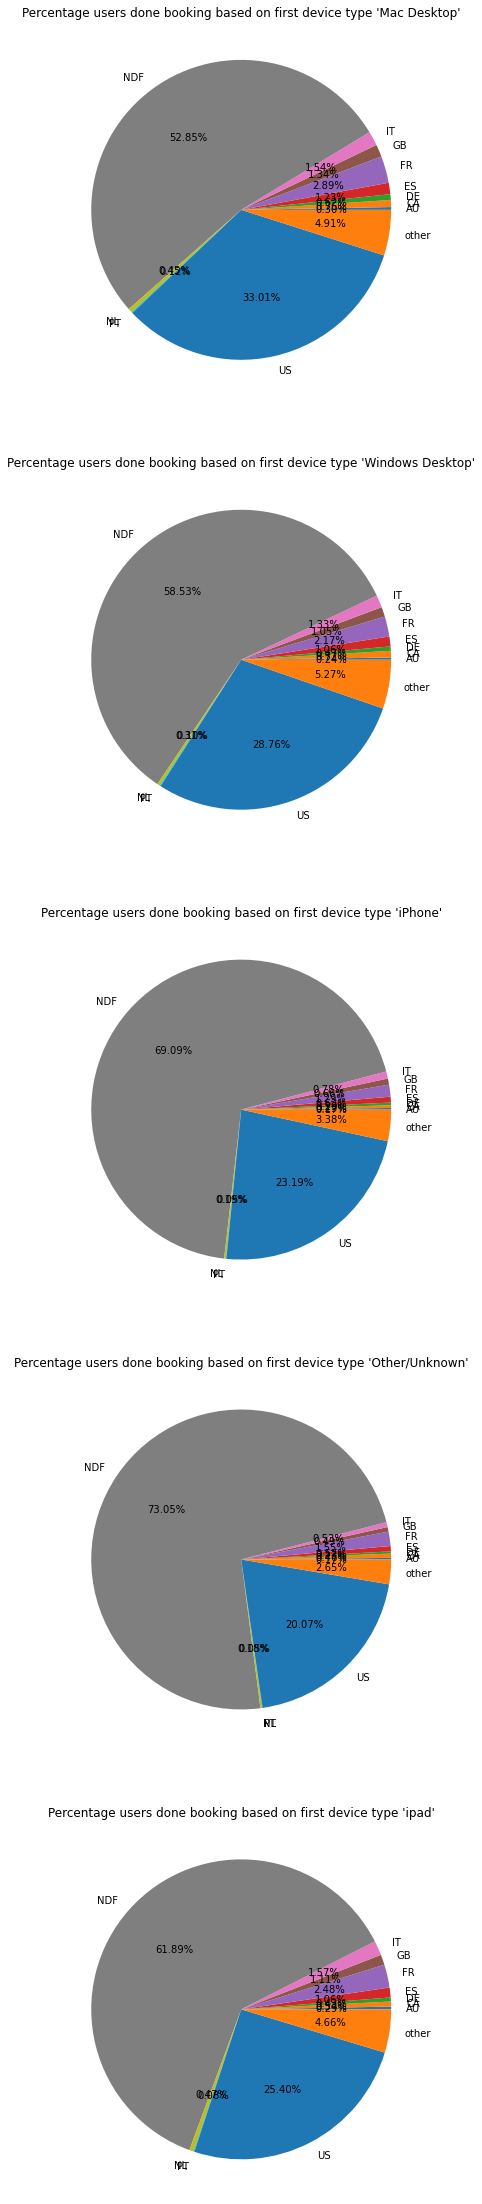

In [38]:
data_mac_d=train_data[train_data['first_device_type']=='Mac Desktop']['country_destination'].value_counts().sort_index()
data_win_d=train_data[train_data['first_device_type']=='Windows Desktop']['country_destination'].value_counts().sort_index()
data_iph=train_data[train_data['first_device_type']=='iPhone']['country_destination'].value_counts().sort_index()
data_ot=train_data[train_data['first_device_type']=='Other/Unknown']['country_destination'].value_counts().sort_index()
data_ipad=train_data[train_data['first_device_type']=='iPad']['country_destination'].value_counts().sort_index()

data=[data_mac_d,data_win_d,data_iph,data_ot,data_ipad]
device_type=['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown','ipad']

fig,ax=plt.subplots(5,figsize=(20,20))
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(ax.shape[0]):
  ax[i].pie(data[i].values,labels=data[i].index,autopct='%1.2f%%')
  ax[i].set_title("Percentage users done booking based on first device type '{}'".format(device_type[i]))

Here we can see a signifiacnt increase in people who use mac desktop make their decision to US. Wherelse many people (69%) who use iphones don't make their bookings (ie NDF) which is higher among the tracked usages.

## First browser


Text(0.5, 1.0, 'Number of users based on thier first browser')

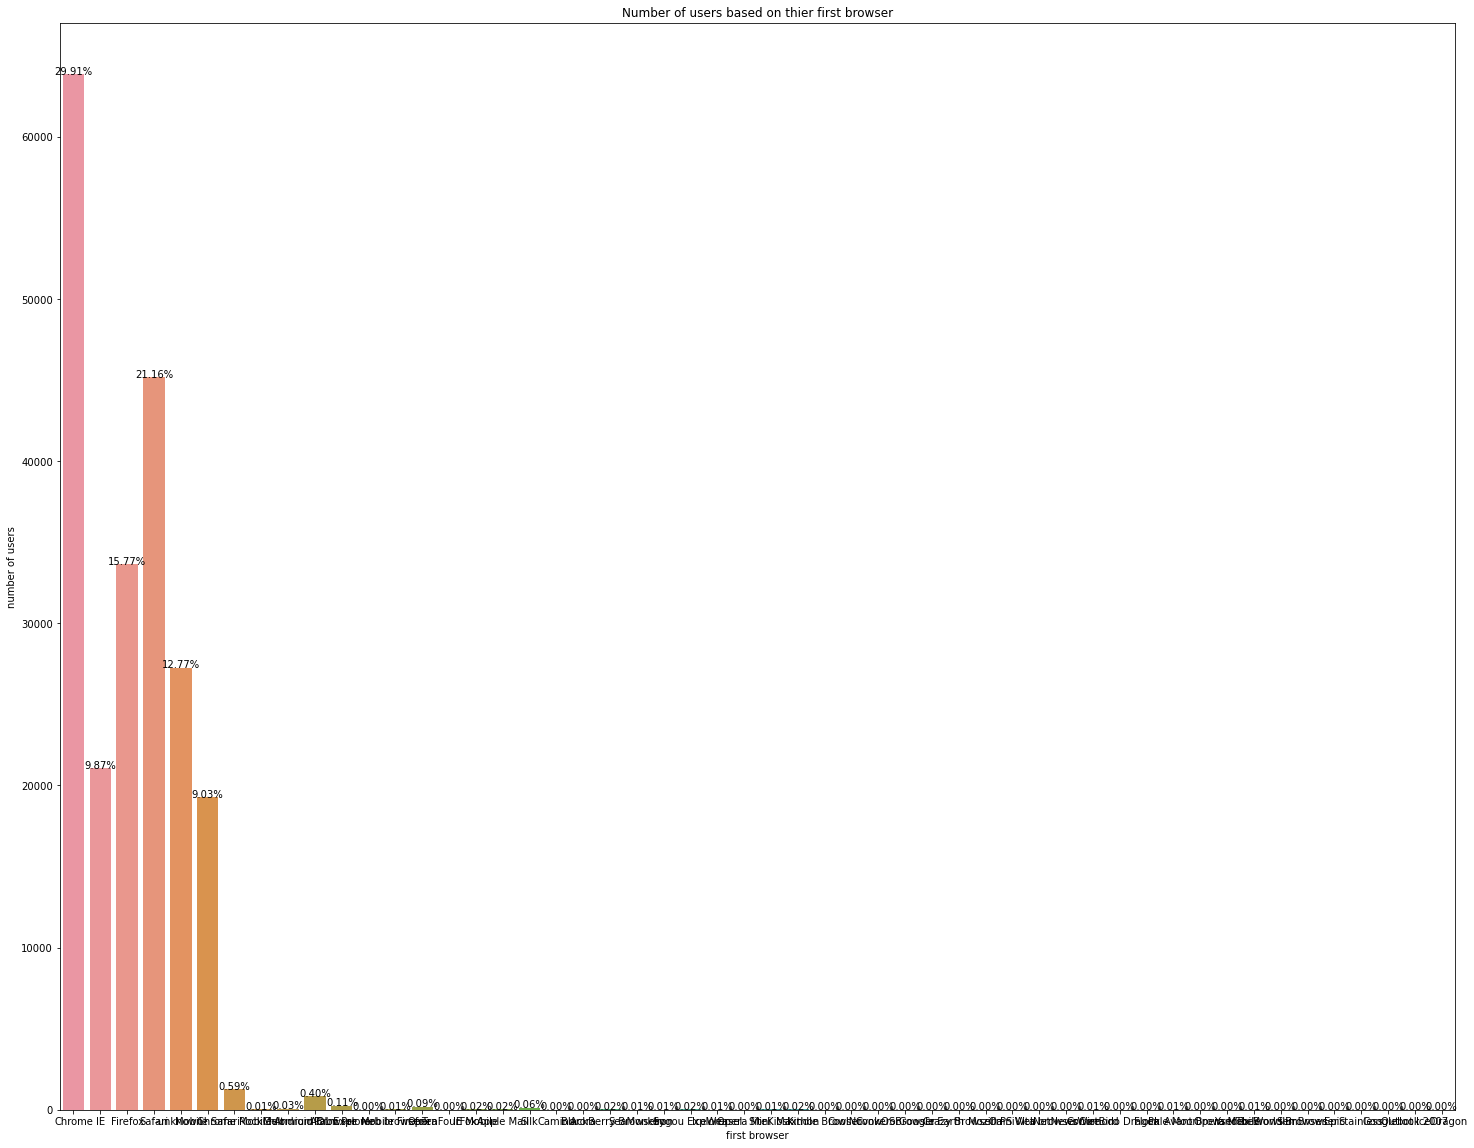

In [39]:
plt.figure(figsize=(25,20))
ax=sns.countplot(data=train_data,x='first_browser')
for p in ax.patches:
  percentage="{:.2f}%".format(100*(p.get_height()/train_data.shape[0]))
  x=p.get_x()+(p.get_width()/2)
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.xlabel("first browser")
plt.ylabel("number of users")
plt.title("Number of users based on thier first browser")

Here we could see a large number of browser just contribute less than 0.01%. 

In [40]:
train_data['first_browser'].value_counts()/train_data.shape[0]*100

Chrome                  29.910846
Safari                  21.161297
Firefox                 15.767085
-unknown-               12.773892
IE                       9.870181
Mobile Safari            9.029707
Chrome Mobile            0.594984
Android Browser          0.398686
AOL Explorer             0.114780
Opera                    0.088076
Silk                     0.058093
Chromium                 0.034200
BlackBerry Browser       0.024830
Maxthon                  0.021551
Apple Mail               0.016866
IE Mobile                0.016866
Sogou Explorer           0.015460
Mobile Firefox           0.014055
SiteKiosk                0.011244
RockMelt                 0.011244
Iron                     0.007964
IceWeasel                0.006090
Pale Moon                0.005622
Yandex.Browser           0.005153
CometBird                0.005153
SeaMonkey                0.005153
Camino                   0.004216
TenFourFox               0.003748
wOSBrowser               0.002811
CoolNovo      

In [41]:
selected_browsers=(train_data['first_browser'].value_counts()/train_data.shape[0]*100).index[:6]
selected_browsers

Index(['Chrome', 'Safari', 'Firefox', '-unknown-', 'IE', 'Mobile Safari'], dtype='object')